# Download Folder analytics

Getting data from your Download folder, getting an overview and maybe get a clue how to declutter.


In [ ]:
### in case modules are not installed
pip install folderstats
pip install matplotlib

In [1]:
import folderstats
import os
import pandas

In [2]:
def get_download_path():
    """Returns the default downloads path for linux or windows"""
    if os.name == 'nt':
        import winreg
        sub_key = r'SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\Shell Folders'
        downloads_guid = '{374DE290-123F-4565-9164-39C4925E467B}'
        with winreg.OpenKey(winreg.HKEY_CURRENT_USER, sub_key) as key:
            location = winreg.QueryValueEx(key, downloads_guid)[0]
        return location
    else:
        return os.path.join(os.path.expanduser('~'), 'downloads')
    
dlfolder = get_download_path()

In [3]:
print(dlfolder)

C:\Users\Seb\Downloads


In [4]:
df = folderstats.folderstats(dlfolder, ignore_hidden=True)
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,2,C:\Users\Seb\Downloads\0.jpg,0,jpg,71634,2019-06-04 11:04:29,2019-06-04 11:04:31,2019-06-04 11:04:31,False,NaN,0,1,0
1,3,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180512001050519_COVER,jpg,2154733,2018-05-12 00:12:05,2018-05-12 00:12:06,2018-05-12 00:12:05,False,NaN,0,1,0
2,4,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180908135737823_COVER,jpg,2522712,2018-09-08 15:27:44,2018-09-08 15:27:45,2018-09-08 15:27:44,False,NaN,0,1,0
3,5,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180908135737823_CO...,jpg,723047,2018-09-08 15:27:40,2018-09-08 15:27:41,2018-09-08 15:27:40,False,NaN,0,1,0
4,6,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20190204234941434_COVER,jpg,5347533,2019-07-13 13:39:32,2019-07-13 13:39:32,2019-07-13 13:39:32,False,NaN,0,1,0


In [5]:
filetypes=df["extension"].value_counts()
#filetypes.rename(columns={'type':'value_counts'})
#filetypes.index.name= 'type'

TypeError: rename() got an unexpected keyword argument 'colunms'

In [6]:
print(filetypes)

png     4310
jpg      701
ini      609
html     568
dll      339
        ... 
scad       1
PNG        1
nif        1
DWG        1
md5        1
Name: extension, Length: 116, dtype: int64


In [7]:
df.insert(5, "sizeMB", round((df['size']/1024/1024),2), True)
df.insert(5, "sizekB", round((df['size']/1024),2), True)
df.head()

,id,path,name,extension,size,sizekB,sizeMB,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,2,C:\Users\Seb\Downloads\0.jpg,0,jpg,71634,69.96,0.07,2019-06-04 11:04:29,2019-06-04 11:04:31,2019-06-04 11:04:31,False,NaN,0,1,0
1,3,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180512001050519_COVER,jpg,2154733,2104.23,2.05,2018-05-12 00:12:05,2018-05-12 00:12:06,2018-05-12 00:12:05,False,NaN,0,1,0
2,4,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180908135737823_COVER,jpg,2522712,2463.59,2.41,2018-09-08 15:27:44,2018-09-08 15:27:45,2018-09-08 15:27:44,False,NaN,0,1,0
3,5,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180908135737823_CO...,jpg,723047,706.10,0.69,2018-09-08 15:27:40,2018-09-08 15:27:41,2018-09-08 15:27:40,False,NaN,0,1,0
4,6,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20190204234941434_COVER,jpg,5347533,5222.20,5.10,2019-07-13 13:39:32,2019-07-13 13:39:32,2019-07-13 13:39:32,False,NaN,0,1,0


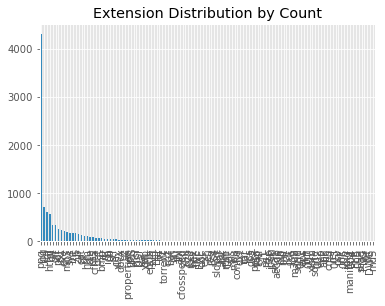

In [8]:
import matplotlib.pyplot as plt

with plt.style.context('ggplot'):
    df['extension'].value_counts().plot(
        kind='bar', color='C1', title='Extension Distribution by Count');

In [9]:
df.describe()

,id,size,sizekB,sizeMB,num_files,depth,parent,uid
count,10460.000000,1.046000e+04,1.046000e+04,10460.000000,633.000000,10460.000000,10460.000000,10460.0
mean,5230.500000,1.963385e+07,1.917368e+04,18.723880,72.733017,3.684990,4959.582122,0.0
std,3019.686242,8.291215e+08,8.096890e+05,790.711906,501.848759,1.515608,3153.523488,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,2615.750000,1.083000e+03,1.060000e+00,0.000000,2.000000,3.000000,2193.000000,0.0
50%,5230.500000,3.202000e+03,3.130000e+00,0.000000,9.000000,4.000000,5104.000000,0.0
75%,7845.250000,3.139200e+04,3.066000e+01,0.030000,31.000000,4.000000,7665.000000,0.0
max,10460.000000,7.629736e+10,7.450914e+07,72762.830000,9827.000000,7.000000,10313.000000,0.0
